In [ ]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
import os
#font = {'family': 'Tahoma'}
font = {'family': 'Times New Roman'}
plt.rc('font', **font)

import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


### Throuput

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


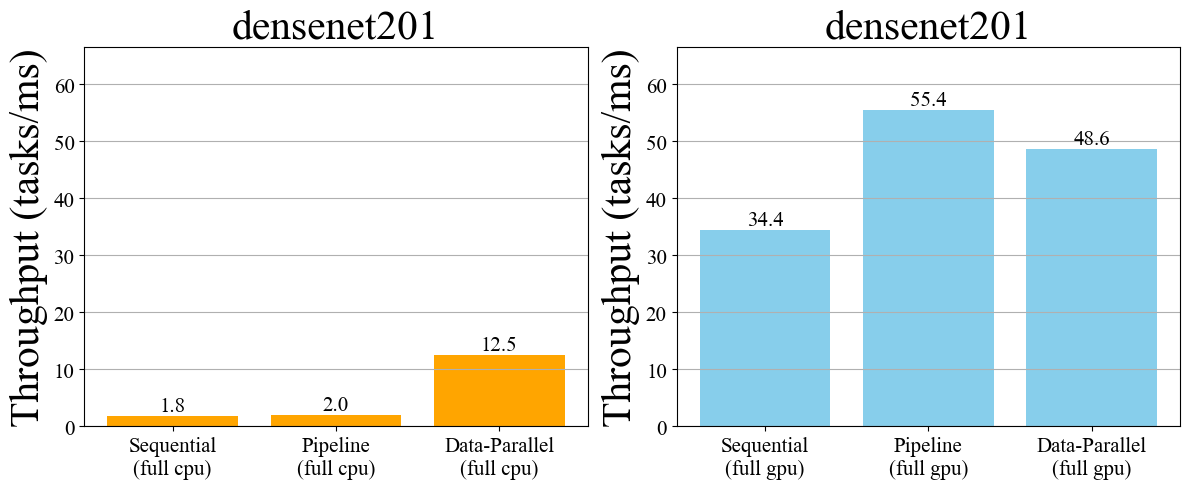

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


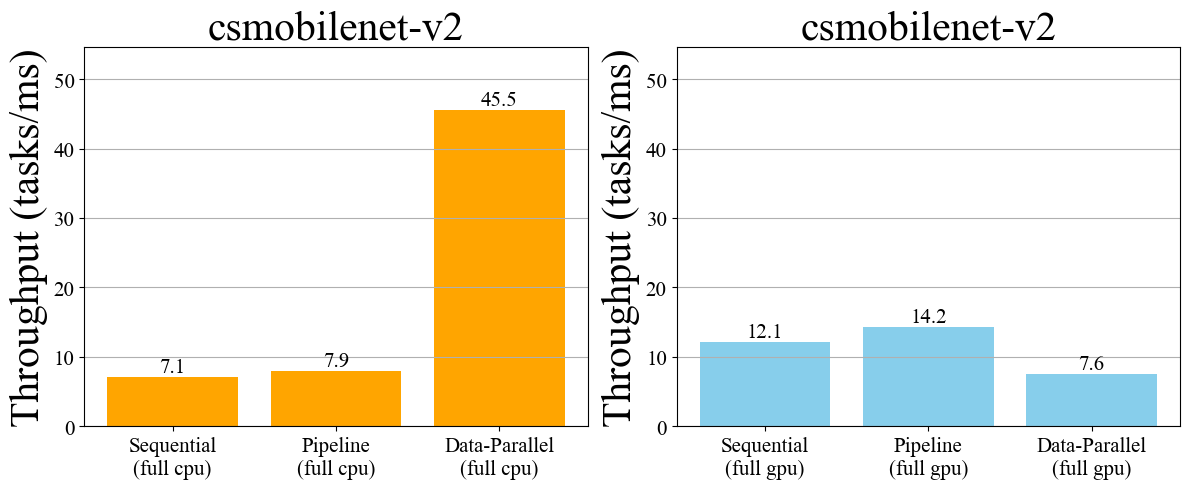

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


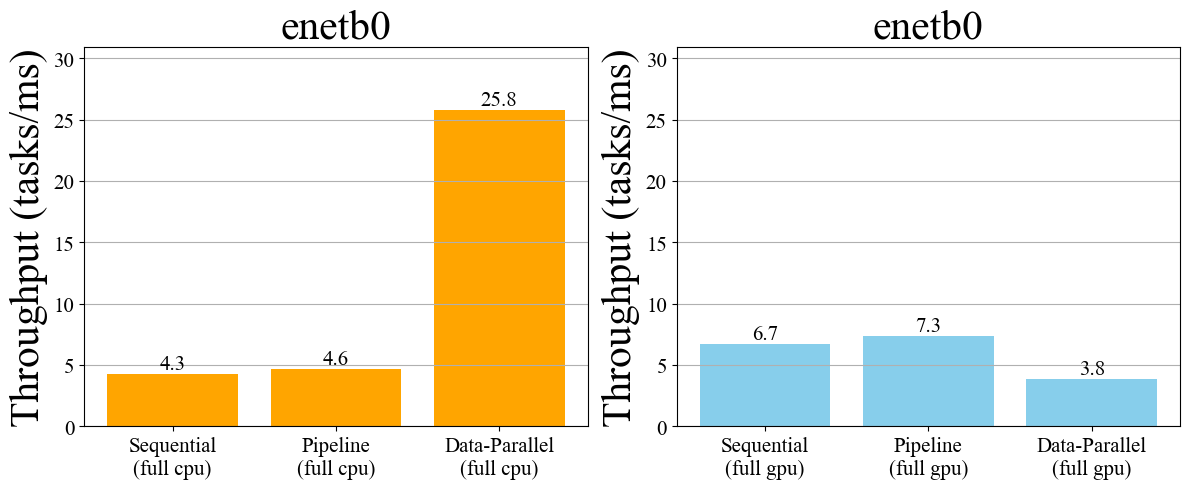

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


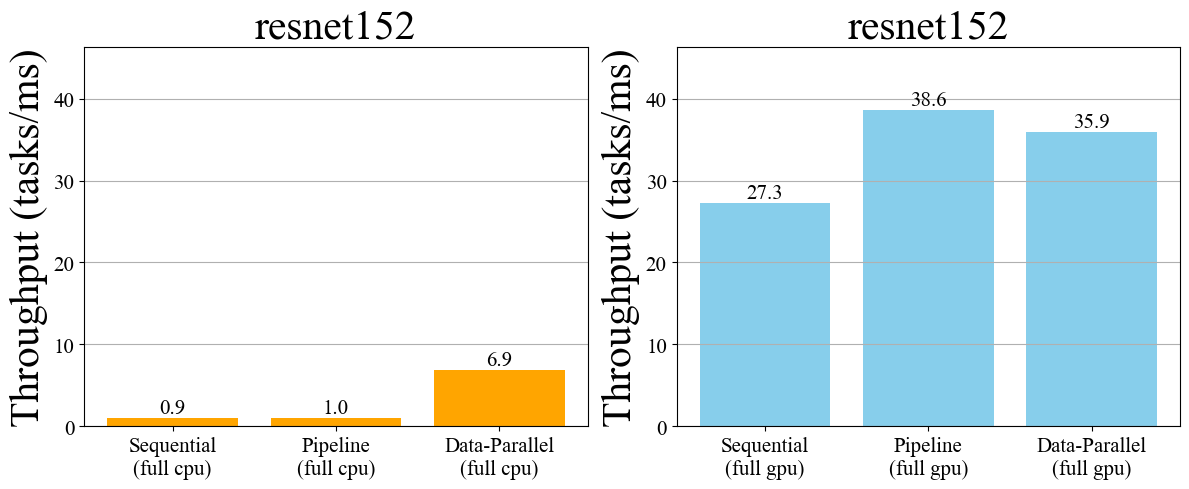

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


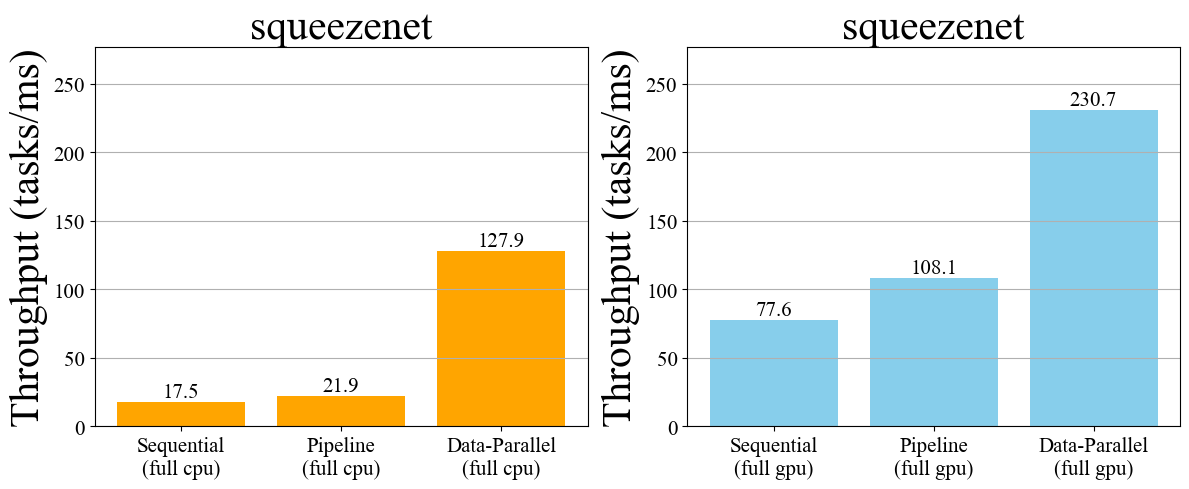

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


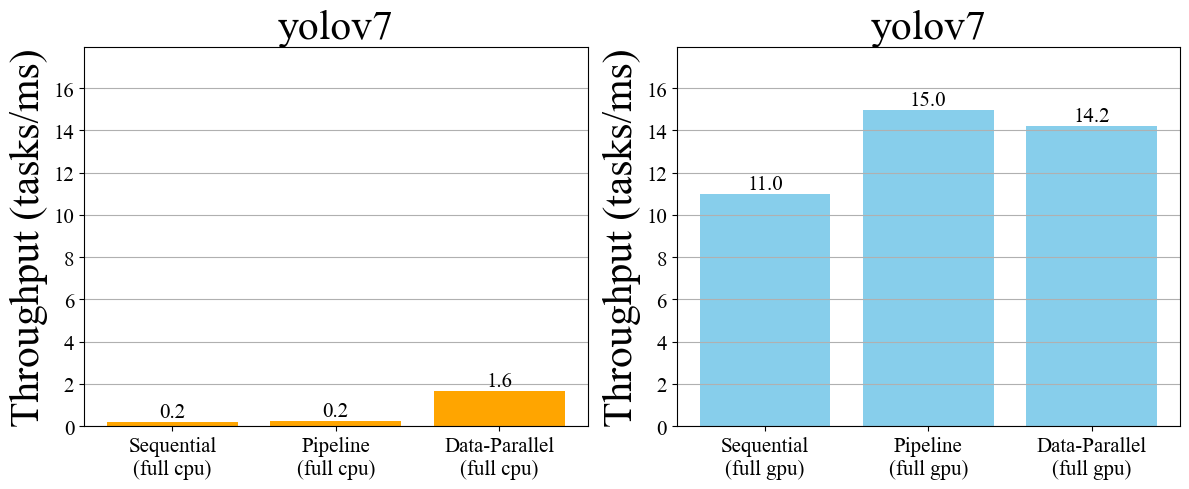

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


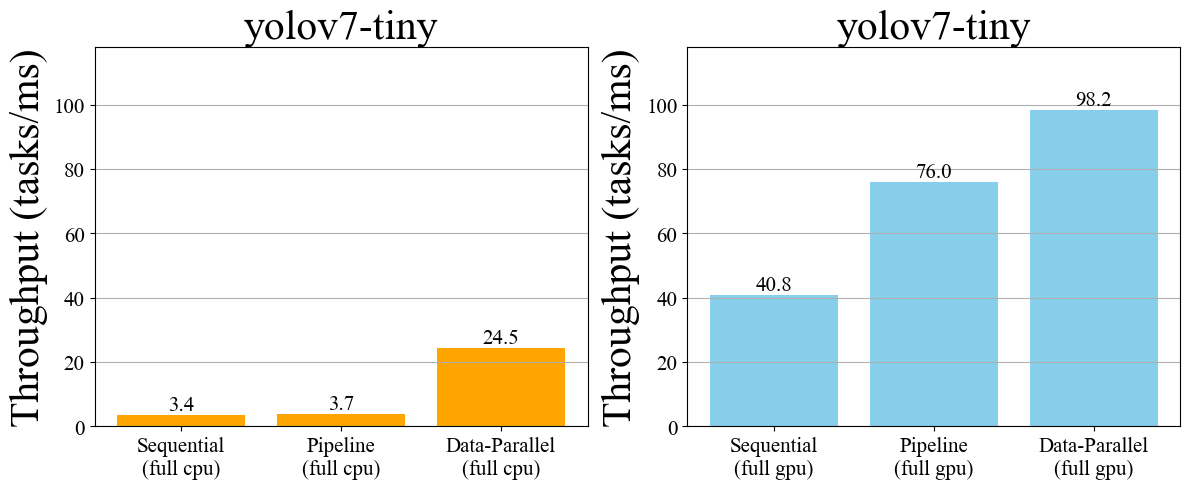

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


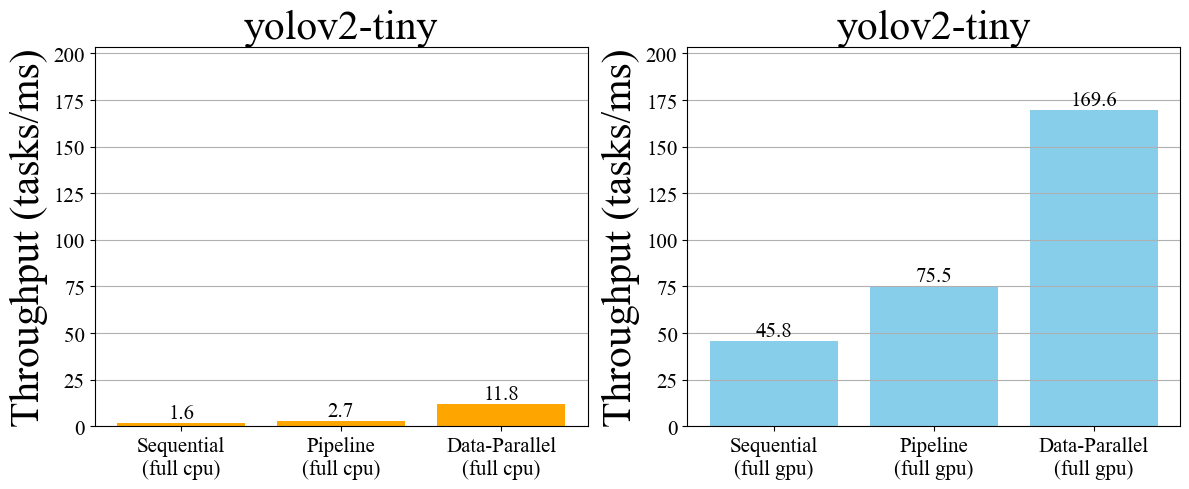

/tmp/ipykernel_40471/2422444666.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_frame_rates.keys())
/tmp/ipykernel_40471/2422444666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_frame_rates.keys())


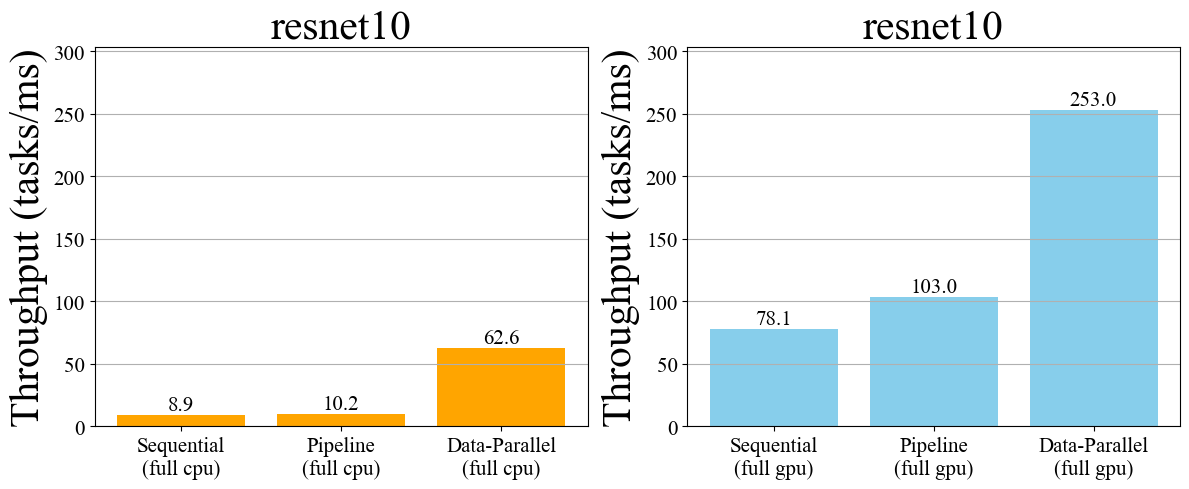

In [23]:
models = ['densenet201', 'csmobilenet-v2', 'enetb0', 'resnet152', 'squeezenet', 'yolov7', 'yolov7-tiny', 'yolov2-tiny', 'resnet10']
for model in models:
    # 파일 경로 설정
    cpu_files = {
        'Sequential\n(full cpu)': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline\n(full cpu)': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel\n(full cpu)': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }
    output_path = f'../graph/throughput/throughput_{model}.png'
    # 데이터 저장을 위한 딕셔너리
    cpu_average_frame_rates = {}
    cpu_average_execution_times = {}

    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in cpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        cpu_average_frame_rate = 1000 / (total_time / len(data))
        cpu_average_frame_rates[label] = cpu_average_frame_rate

        # execution_time의 평균 계산
        cpu_average_execution_time = data['execution_time'].mean()
        cpu_average_execution_times[label] = cpu_average_execution_time

    gpu_files = {
        'Sequential\n(full gpu)': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline\n(full gpu)': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel\n(full gpu)': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }
    # 데이터 저장을 위한 딕셔너리
    gpu_average_frame_rates = {}
    gpu_average_execution_times = {}
    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in gpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        gpu_average_frame_rate = 1000 / (total_time / len(data))
        gpu_average_frame_rates[label] = gpu_average_frame_rate

        # execution_time의 평균 계산
        gpu_average_execution_time = data['execution_time'].mean()
        gpu_average_execution_times[label] = gpu_average_execution_time


    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 첫 번째 그래프: Average Frame Rate (full cpu)
    bars1 = ax1.bar(cpu_average_frame_rates.keys(), cpu_average_frame_rates.values(), color='orange')
    #ax1.set_xlabel('File Type')
    ax1.set_ylabel('Throughput (tasks/ms)', size = 30)
    ax1.set_title(f'{model}', size = 30)
    ax1.set_xticklabels(cpu_average_frame_rates.keys())
    ax1.grid(True, axis = 'y')
    ax1.tick_params(labelsize=15)

    # 막대 위에 텍스트 추가
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)

    # 두 번째 그래프: Average Frame Rate (full gpu)
    bars1 = ax2.bar(gpu_average_frame_rates.keys(), gpu_average_frame_rates.values(), color='skyblue')
    #ax1.set_xlabel('File Type')
    ax2.set_ylabel('Throughput (tasks/ms)', size = 30)
    ax2.set_title(f'{model}', size = 30)
    ax2.set_xticklabels(gpu_average_frame_rates.keys())
    ax2.grid(True, axis = 'y')
    ax2.tick_params(labelsize=15)
    max_frame_rate = max(gpu_average_frame_rates.values()) * 1.2

    max_frame_rate = max(max(cpu_average_frame_rates.values()) * 1.2, max(gpu_average_frame_rates.values()) * 1.2)
    ax1.set_ylim(0, max_frame_rate)
    ax2.set_ylim(0, max_frame_rate)

    # 막대 위에 텍스트 추가
    for bar in bars1:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
    
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

### Delay

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


1271.0348571428572


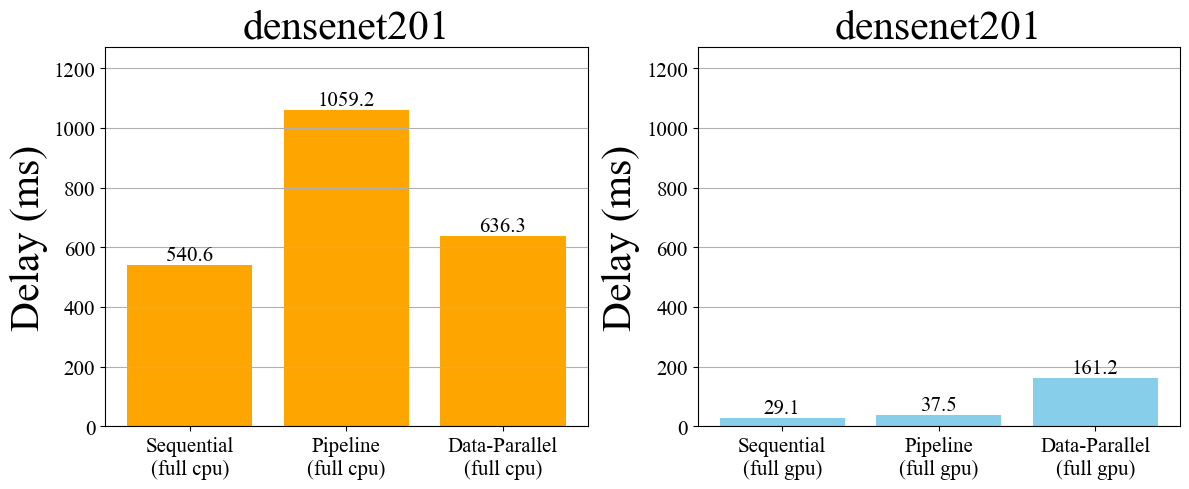

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


1261.5337105263159


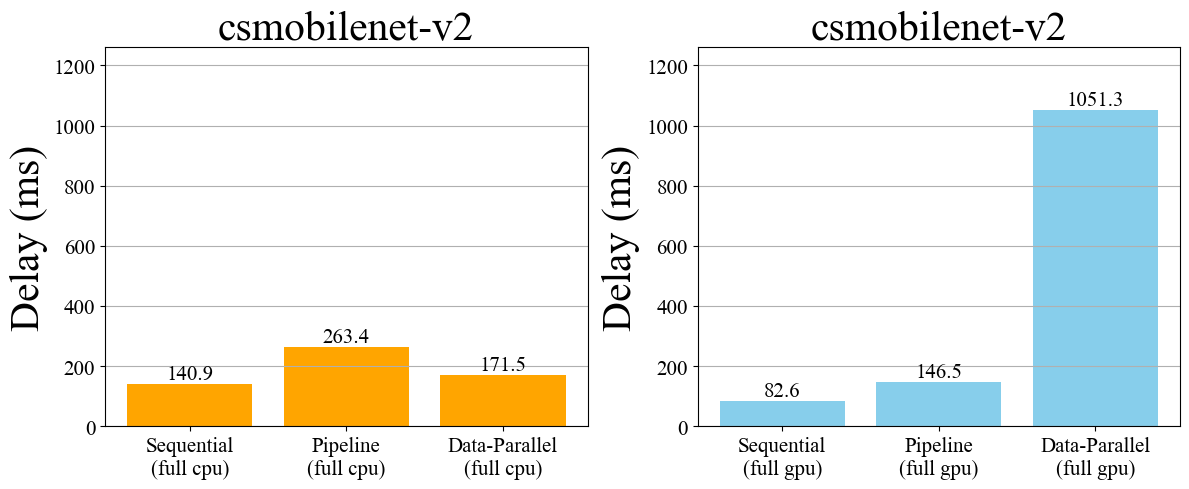

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


2508.1102105263153


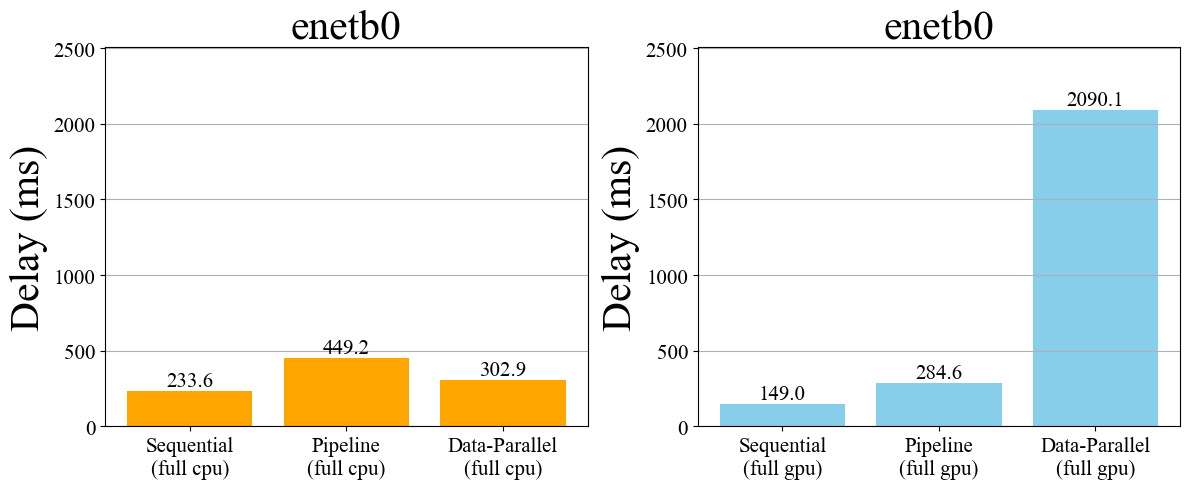

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


2530.5017142857146


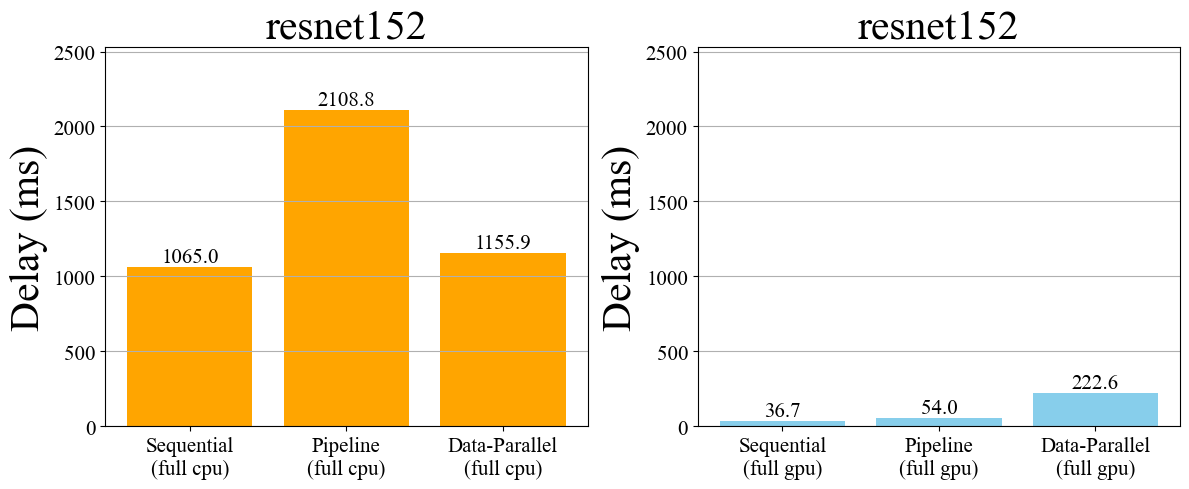

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


114.31045714285715


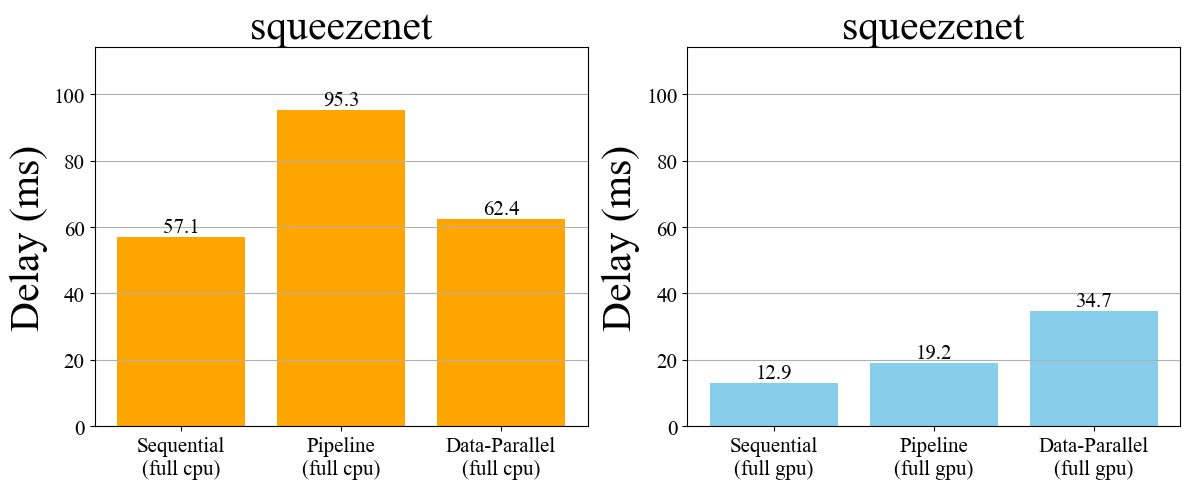

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


11055.397542857141


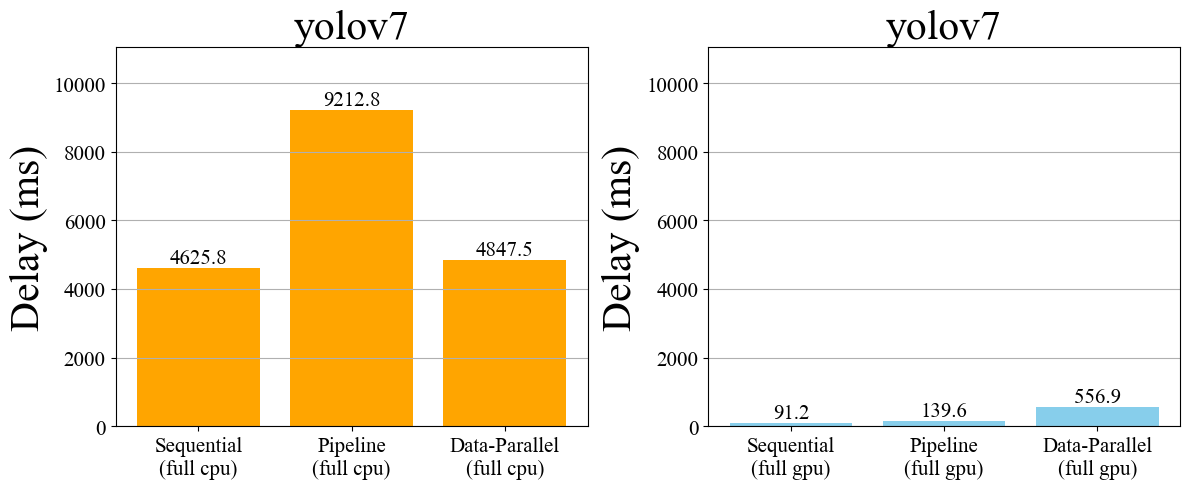

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


676.4556000000001


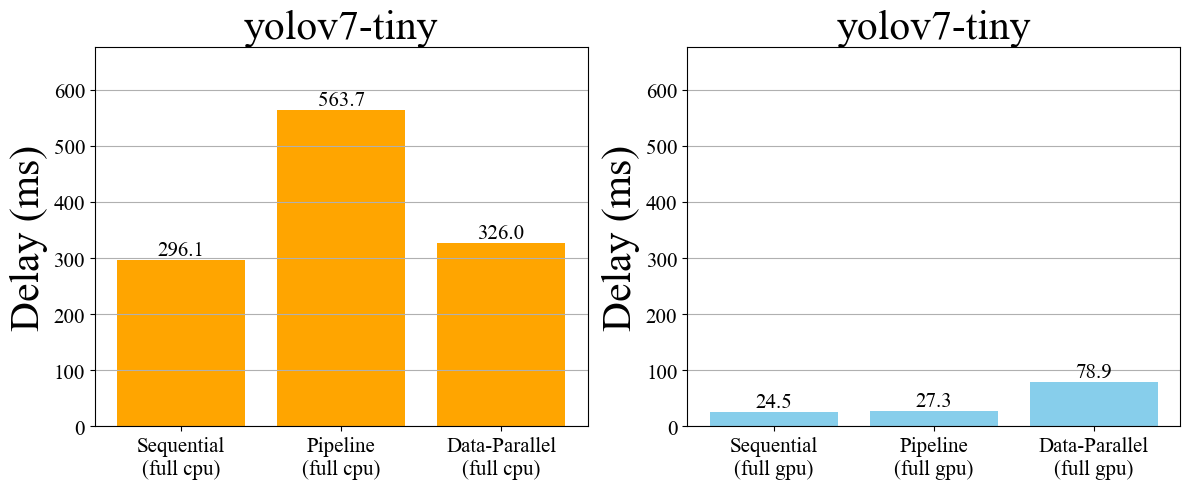

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


933.4453714285714


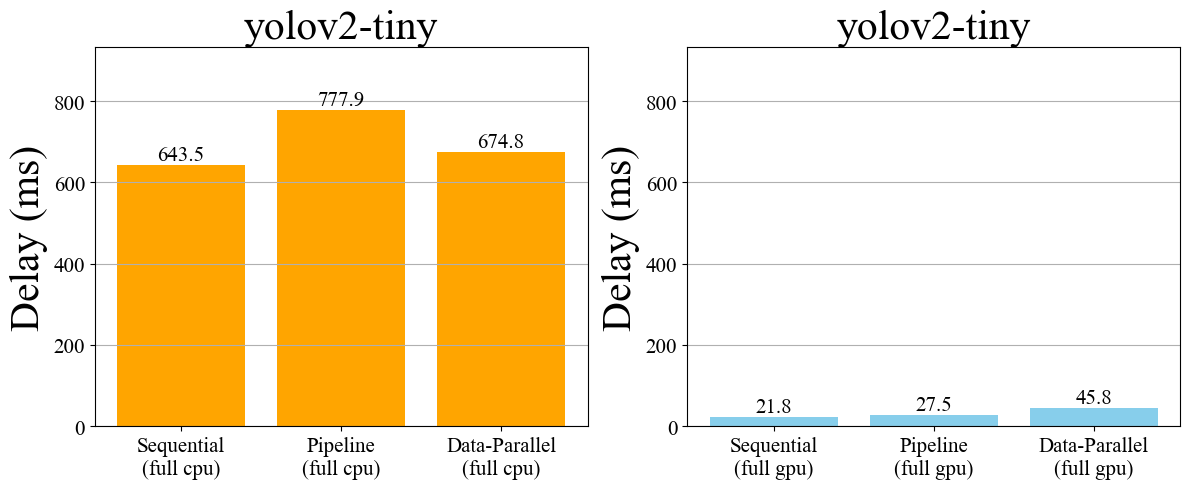

/tmp/ipykernel_40471/1143901320.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cpu_average_execution_times.keys())
/tmp/ipykernel_40471/1143901320.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpu_average_execution_times.keys())


246.44691428571429


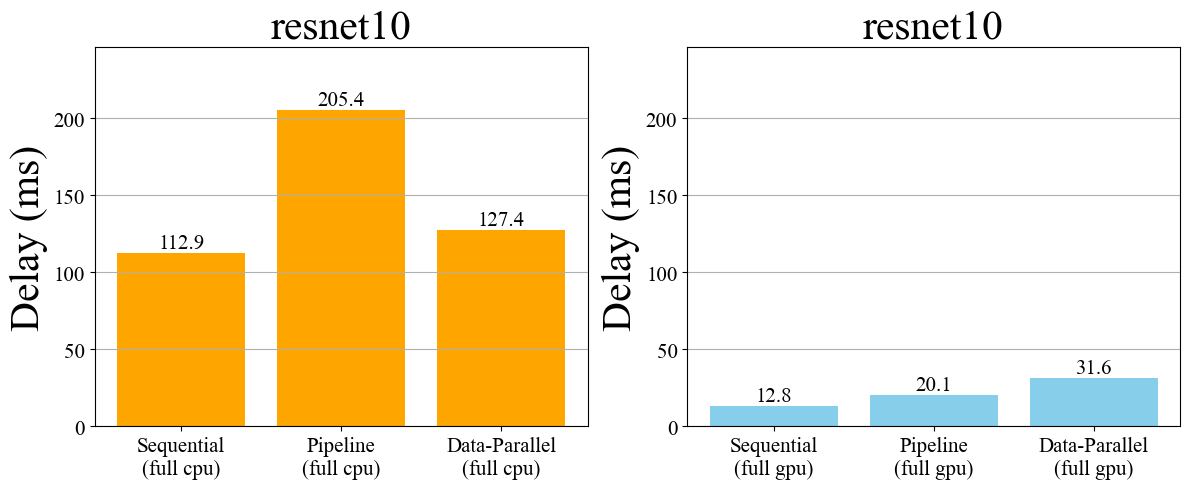

In [24]:
models = ['densenet201', 'csmobilenet-v2', 'enetb0', 'resnet152', 'squeezenet', 'yolov7', 'yolov7-tiny', 'yolov2-tiny', 'resnet10']

for model in models:
    # 파일 경로 설정
    cpu_files = {
        'Sequential\n(full cpu)': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline\n(full cpu)': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel\n(full cpu)': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }
    output_path = f'../graph/delay/delay_{model}.png'
    # 데이터 저장을 위한 딕셔너리
    cpu_average_frame_rates = {}
    cpu_average_execution_times = {}

    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in cpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        cpu_average_frame_rate = 1000 / (total_time / len(data))
        cpu_average_frame_rates[label] = cpu_average_frame_rate

        # execution_time의 평균 계산
        cpu_average_execution_time = data['execution_time'].mean()
        cpu_average_execution_times[label] = cpu_average_execution_time

    gpu_files = {
        'Sequential\n(full gpu)': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline\n(full gpu)': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel\n(full gpu)': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }
    # 데이터 저장을 위한 딕셔너리
    gpu_average_frame_rates = {}
    gpu_average_execution_times = {}
    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in gpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        gpu_average_frame_rate = 1000 / (total_time / len(data))
        gpu_average_frame_rates[label] = gpu_average_frame_rate

        # execution_time의 평균 계산
        gpu_average_execution_time = data['execution_time'].mean()
        gpu_average_execution_times[label] = gpu_average_execution_time


    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 첫 번째 그래프: Average Execution Time
    bar1 = ax1.bar(cpu_average_execution_times.keys(), cpu_average_execution_times.values(), color='orange')
    #ax2.set_xlabel('File Type')
    ax1.set_ylabel('Delay (ms)', size = 30)
    ax1.set_title(f'{model}', size = 30)
    ax1.set_xticklabels(cpu_average_execution_times.keys())
    ax1.grid(True, axis = 'y')
    
    # 막대 위에 텍스트 추가
    for bar in bar1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax1.tick_params(labelsize=15)

    # 두 번째 그래프: Average Execution Time
    bars2 = ax2.bar(gpu_average_execution_times.keys(), gpu_average_execution_times.values(), color='skyblue')
    #ax2.set_xlabel('File Type')
    ax2.set_ylabel('Delay (ms)', size = 30)
    ax2.set_title(f'{model}', size = 30)
    ax2.set_xticklabels(gpu_average_execution_times.keys())
    ax2.grid(True, axis = 'y')
    # 막대 위에 텍스트 추가
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax2.tick_params(labelsize=15)
    
    max_execution_time = max(max(cpu_average_execution_times.values()), max(gpu_average_execution_times.values())) * 1.2
    ax1.set_ylim(0, max_execution_time)
    ax2.set_ylim(0, max_execution_time)
    print(max_execution_time)

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

### Pre-Infer-Post

749.4972631578948


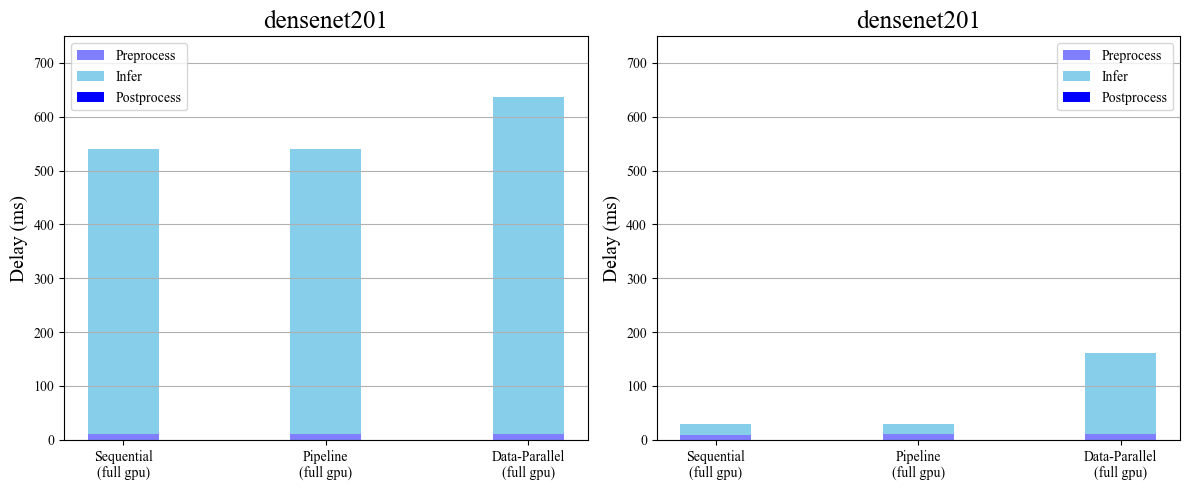

1250.109


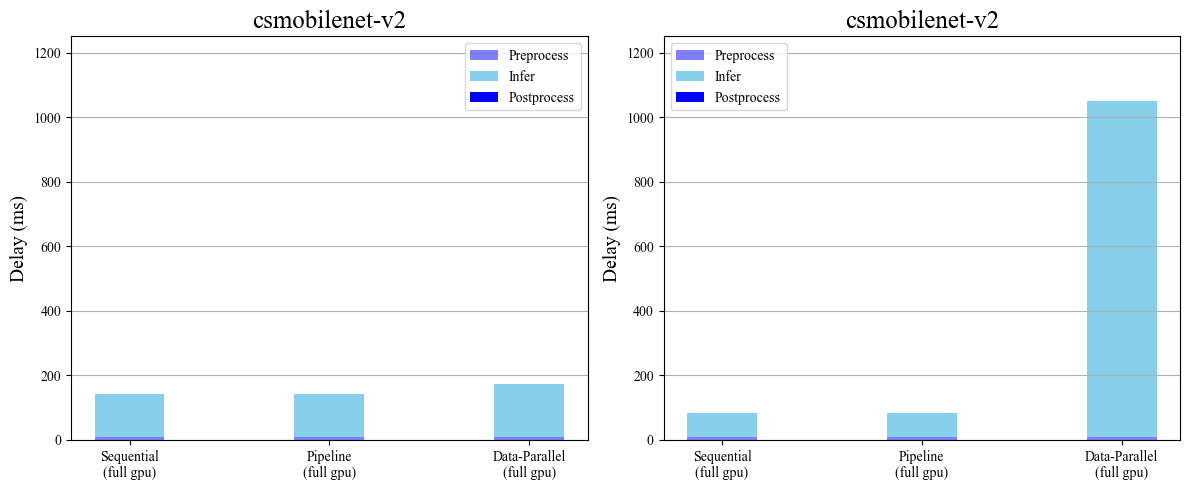

2496.516236842105


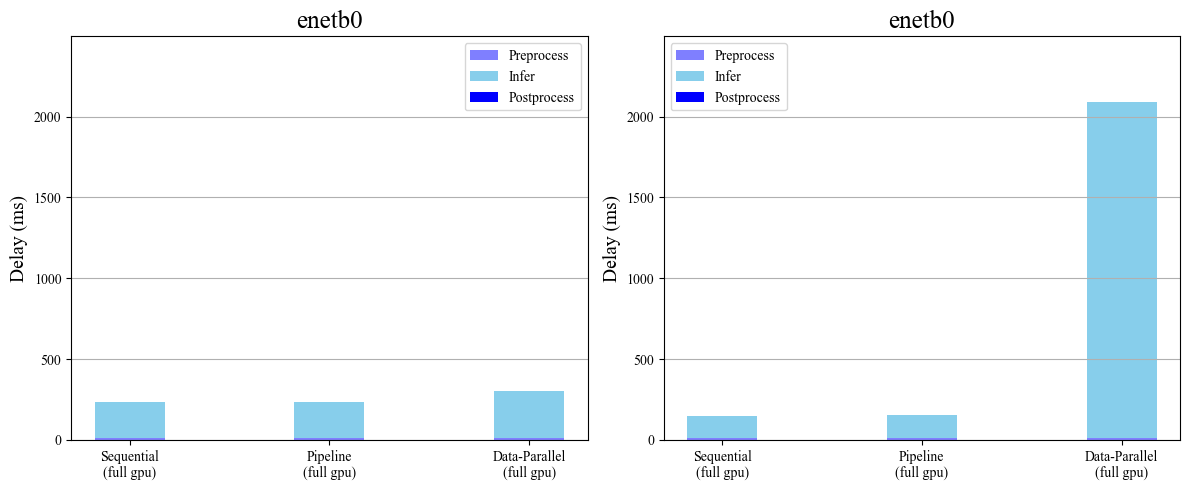

1374.7592368421053


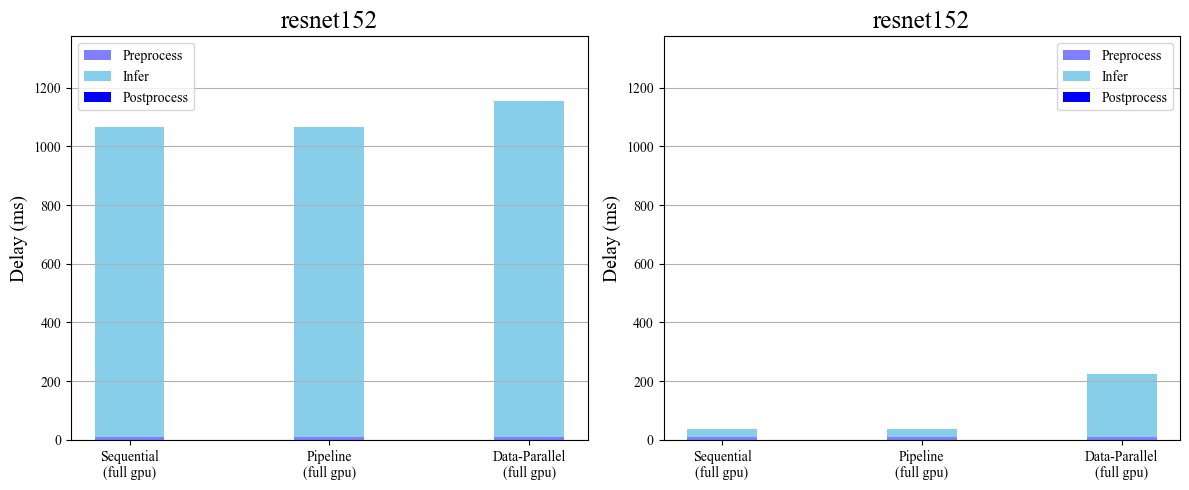

62.93226315789473


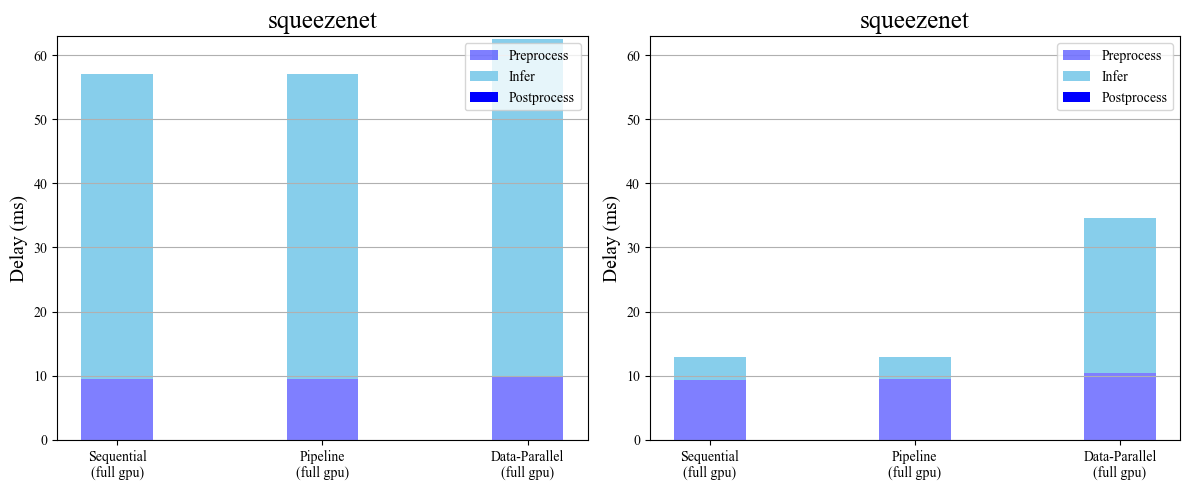

5786.3944736842095


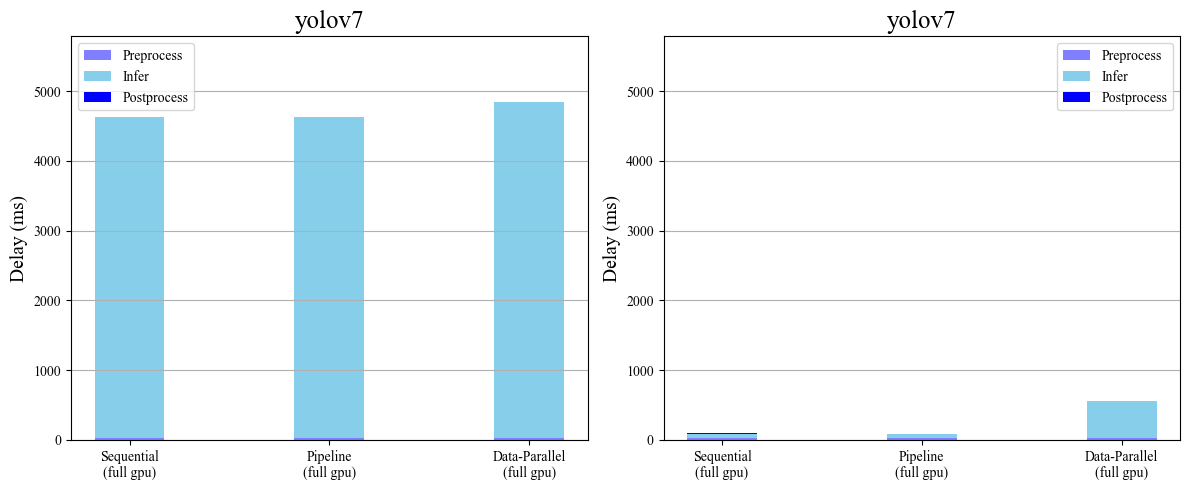

372.62676315789474


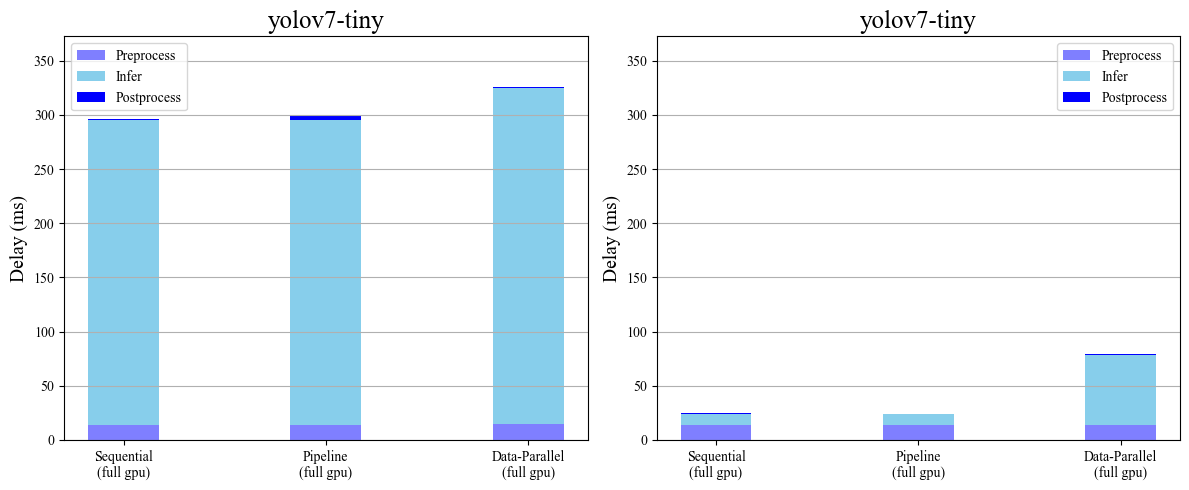

542.6548684210527


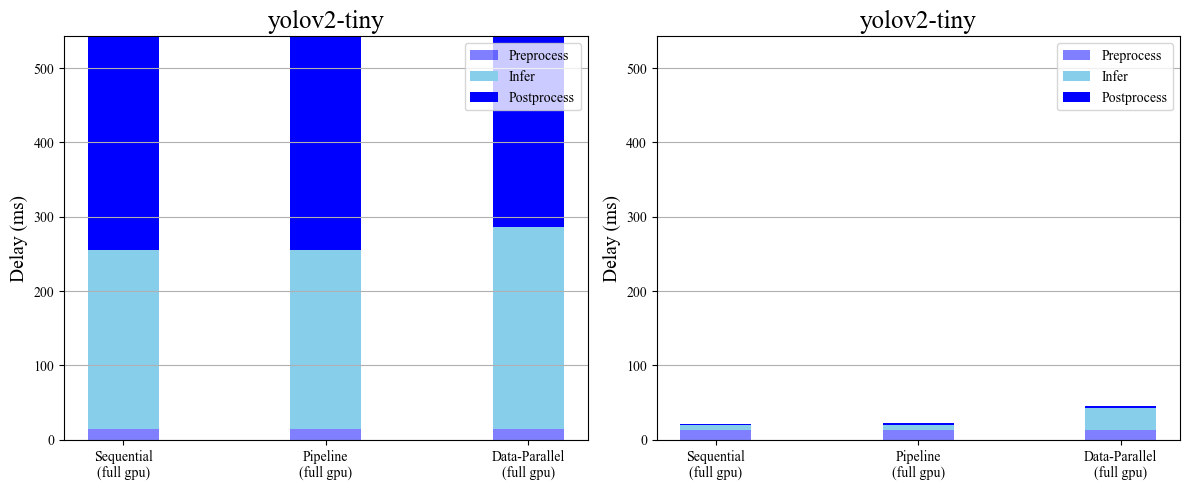

139.61826315789475


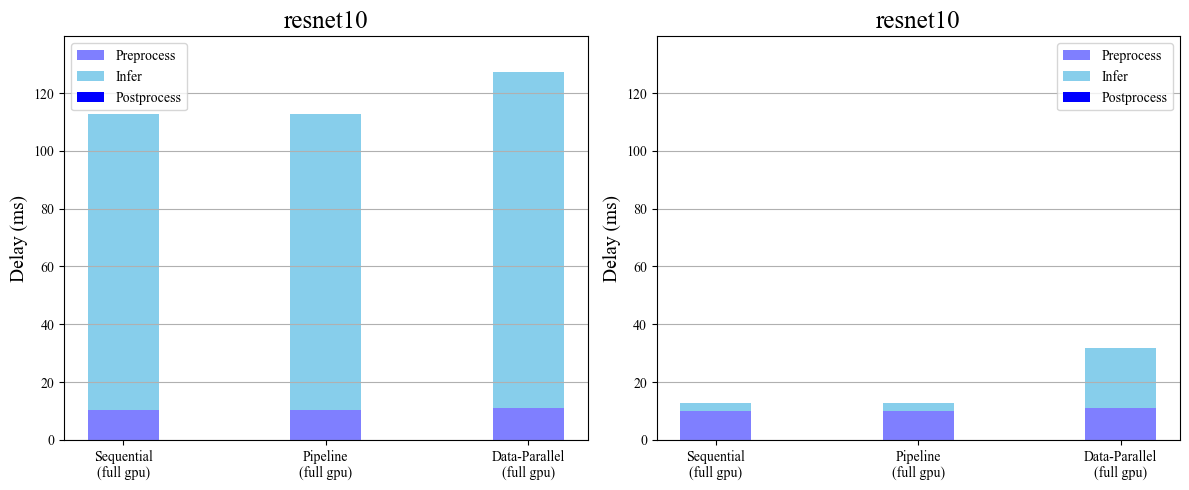

In [ ]:
models = ['densenet201', 'csmobilenet-v2', 'enetb0', 'resnet152', 'squeezenet', 'yolov7', 'yolov7-tiny', 'yolov2-tiny', 'resnet10']

for model in models:
    # 파일 경로 설정
    cpu_files = {
        'Sequential\n(full cpu)': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline\n(full cpu)': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel\n(full cpu)': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }
    output_path = f'../graph/delay/pre_infer_post_{model}.png'

    # 데이터 저장을 위한 딕셔너리
    cpu_average_execution_times = {}
    cpu_average_pre = {}
    cpu_average_infer = {}
    cpu_average_post = {}

    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in cpu_files.items():
        data = pd.read_csv(file_path)
        # execution_time의 평균 계산
        cpu_average_execution_times[label] = data['execution_time'].mean()
        cpu_average_pre[label] =  data['e_preprocess'].mean()
        cpu_average_infer[label] =  data['e_infer'].mean()
        cpu_average_post[label] =  data['e_postprocess'].mean()

    gpu_files = {
        'Sequential\n(full gpu)': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline\n(full gpu)': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel\n(full gpu)': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }

    # 데이터 저장을 위한 딕셔너리
    gpu_average_execution_times = {}
    gpu_average_pre = {}
    gpu_average_infer = {}
    gpu_average_post = {}

    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in gpu_files.items():
        data = pd.read_csv(file_path)
        gpu_average_execution_times[label] = data['execution_time'].mean()
        gpu_average_pre[label] =  data['e_preprocess'].mean()
        gpu_average_infer[label] =  data['e_infer'].mean()
        gpu_average_post[label] =  data['e_postprocess'].mean()


    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    labels = list(gpu_average_pre.keys())
    x = range(len(labels))  # x축 위치
    width = 0.35  # 막대 폭

    ax1.bar(x, cpu_average_pre.values(), width, label='Preprocess', color='blue', alpha=0.5)
    ax1.bar(x, cpu_average_infer.values(), width, bottom=list(cpu_average_pre.values()), label='Infer', color='skyblue', alpha=1)
    ax1.bar(x, cpu_average_post.values(), width, bottom=[i + j for i, j in zip(cpu_average_pre.values(), cpu_average_infer.values())],
            label='Postprocess', color='blue', alpha=1)
    ax1.set_title(f'{model}', size=18)
    ax1.set_ylabel('Delay (ms)', size=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.legend(fontsize=10)
    ax1.grid(True, axis = 'y')


    ax2.bar(x, gpu_average_pre.values(), width, label='Preprocess', color='blue', alpha=0.5)
    ax2.bar(x, gpu_average_infer.values(), width, bottom=list(gpu_average_pre.values()), label='Infer', color='skyblue', alpha=1)
    ax2.bar(x, gpu_average_post.values(), width, bottom=[i + j for i, j in zip(gpu_average_pre.values(), gpu_average_infer.values())],
            label='Postprocess', color='blue', alpha=1)
    ax2.set_title(f'{model}', size=18)
    ax2.set_ylabel('Delay (ms)', size=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    ax2.legend(fontsize=10)
    ax2.grid(True, axis = 'y')
    
    if model == 'yolov2-tiny':
        a=5
    else:
        a=1.2

    max_execution_time = max(max(cpu_average_infer.values()), max(gpu_average_infer.values())) * a
    ax1.set_ylim(0, max_execution_time)
    ax2.set_ylim(0, max_execution_time)
    print(max_execution_time)
    

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

### Min, Avg, Max 나란히

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 각 모델별로 데이터 처리
for model in models:
    # CPU와 GPU 데이터를 처리
    cpu_files = {
        'Sequential\n(full cpu)': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline\n(full cpu)': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel\n(full cpu)': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }

    gpu_files = {
        'Sequential\n(full gpu)': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline\n(full gpu)': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel\n(full gpu)': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }

    def process_files(files):
        avg_times, min_times, max_times = {}, {}, {}
        for label, file_path in files.items():
            data = pd.read_csv(file_path)
            avg_times[label] = data['execution_time'].mean()
            min_times[label] = data['execution_time'].min()
            max_times[label] = data['execution_time'].max()
        return avg_times, min_times, max_times

    cpu_avg, cpu_min, cpu_max = process_files(cpu_files)
    gpu_avg, gpu_min, gpu_max = process_files(gpu_files)

    # 그래프 그리기
    labels = list(cpu_avg.keys())
    x = range(len(labels))  # x축 위치
    width = 0.2  # 막대 폭

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # CPU 데이터 추가
    ax1.bar([pos - width for pos in x], cpu_min.values(), width, label='CPU Min', color='orange', alpha=0.2)
    ax1.bar(x, cpu_avg.values(), width, label='CPU Avg', color='orange', alpha=0.4)
    ax1.bar([pos + width for pos in x], cpu_max.values(), width, label='CPU Max', color='orange', alpha=0.6)

    # GPU 데이터 추가
    ax2.bar([pos - width for pos in x], gpu_min.values(), width, label='GPU Min', color='blue', alpha=0.2)
    ax2.bar(x, gpu_avg.values(), width, label='GPU Avg', color='blue', alpha=0.4)
    ax2.bar([pos + width for pos in x], gpu_max.values(), width, label='GPU Max', color='blue', alpha=0.6)

    # 설정: x축 라벨과 타이틀 추가
    def add_labels(ax, avg, min_, max_, labels):
        new_labels = []
        for label in labels:
            new_labels.extend(["Min", f"Avg\n{label}", "Max"])
        flattened_positions = []
        for pos in x:
            flattened_positions.extend([pos - width, pos, pos + width])
        ax.set_xticks(flattened_positions)
        ax.set_xticklabels(new_labels, rotation=15, ha='center')

    # CPU 설정
    add_labels(ax1, cpu_avg, cpu_min, cpu_max, labels)
    ax1.set_ylabel('Execution Time (ms)', size=15)
    ax1.set_title(f'{model} (CPU)', size=18)
    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax1.legend(fontsize=10)

    # GPU 설정
    add_labels(ax2, gpu_avg, gpu_min, gpu_max, labels)
    ax2.set_ylabel('Execution Time (ms)', size=15)
    ax2.set_title(f'{model} (GPU)', size=18)
    ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax2.legend(fontsize=10)

    # 출력 저장
    output_path = f'../graph/delay_min_avg_max_{model}.png'
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()


### Min, Avg, Max 각각

In [ ]:
models = ['densenet201', 'csmobilenet-v2', 'enetb0', 'resnet152', 'squeezenet', 'yolov7', 'yolov7-tiny']

for model in models:
    # 파일 경로 설정
    cpu_files = {
        'Sequential\n(full cpu)': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline\n(full cpu)': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel\n(full cpu)': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }
    
    # 데이터 저장을 위한 딕셔너리
    cpu_average_frame_rates = {}
    cpu_average_execution_times = {}
    cpu_max_execution_times = {}
    cpu_min_execution_times = {}

    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in cpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        cpu_average_frame_rate = 1000 / (total_time / len(data))
        cpu_average_frame_rates[label] = cpu_average_frame_rate

        # execution_time의 평균 계산
        cpu_average_execution_times[label] = data['execution_time'].mean()
        cpu_max_execution_times[label] = data['execution_time'].max()
        cpu_min_execution_times[label] = data['execution_time'].min()

    gpu_files = {
        'Sequential\n(full gpu)': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline\n(full gpu)': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel\n(full gpu)': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }
    # 데이터 저장을 위한 딕셔너리
    gpu_average_frame_rates = {}
    gpu_average_execution_times = {}
    gpu_max_execution_times = {}
    gpu_min_execution_times = {}
    # 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in gpu_files.items():
        data = pd.read_csv(file_path)
        # frame_rate의 평균 계산
        total_time = data.iloc[-1]['end_postprocess'] - data.iloc[0]['start_preprocess']
        gpu_average_frame_rate = 1000 / (total_time / len(data))
        gpu_average_frame_rates[label] = gpu_average_frame_rate

        # execution_time의 평균 계산
        gpu_average_execution_times[label] = data['execution_time'].mean()
        gpu_max_execution_times[label] = data['execution_time'].max()
        gpu_min_execution_times[label] = data['execution_time'].min()


    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 첫 번째 그래프: Average Execution Time
    bar1 = ax1.bar(cpu_average_execution_times.keys(), cpu_average_execution_times.values(), color='orange')
    #ax2.set_xlabel('File Type')
    ax1.set_ylabel('Avg. Delay (ms)', size = 30)
    ax1.set_title(f'{model}', size = 30)
    ax1.set_xticklabels(cpu_average_execution_times.keys())
    ax1.grid(True, axis = 'y')
    
    # 막대 위에 텍스트 추가
    for bar in bar1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax1.tick_params(labelsize=15)

    # 두 번째 그래프: Average Execution Time
    bars2 = ax2.bar(gpu_average_execution_times.keys(), gpu_average_execution_times.values(), color='skyblue')
    #ax2.set_xlabel('File Type')
    ax2.set_ylabel('Avg. Delay (ms)', size = 30)
    ax2.set_title(f'{model}', size = 30)
    ax2.set_xticklabels(gpu_average_execution_times.keys())
    ax2.grid(True, axis = 'y')
    # 막대 위에 텍스트 추가
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax2.tick_params(labelsize=15)
    
    max_execution_time = max(max(cpu_average_execution_times.values()), max(gpu_average_execution_times.values())) * 1.2
    ax1.set_ylim(0, max_execution_time)
    ax2.set_ylim(0, max_execution_time)
    
    output_path = f'../graph/delay_avg_{model}.png'
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 첫 번째 그래프: Average Execution Time
    bar1 = ax1.bar(cpu_max_execution_times.keys(), cpu_max_execution_times.values(), color='orange')
    #ax2.set_xlabel('File Type')
    ax1.set_ylabel('Max. Delay (ms)', size = 30)
    ax1.set_title(f'{model}', size = 30)
    ax1.set_xticklabels(cpu_max_execution_times.keys())
    ax1.grid(True, axis = 'y')
    
    # 막대 위에 텍스트 추가
    for bar in bar1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax1.tick_params(labelsize=15)

    # 두 번째 그래프: Average Execution Time
    bars2 = ax2.bar(gpu_max_execution_times.keys(), gpu_max_execution_times.values(), color='skyblue')
    #ax2.set_xlabel('File Type')
    ax2.set_ylabel('Max. Delay (ms)', size = 30)
    ax2.set_title(f'{model}', size = 30)
    ax2.set_xticklabels(gpu_max_execution_times.keys())
    ax2.grid(True, axis = 'y')
    # 막대 위에 텍스트 추가
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax2.tick_params(labelsize=15)
    
    max_execution_time = max(max(cpu_max_execution_times.values()), max(gpu_max_execution_times.values())) * 1.2
    ax1.set_ylim(0, max_execution_time)
    ax2.set_ylim(0, max_execution_time)
    
    output_path = f'../graph/delay_max_{model}.png'
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

    # 1행 2열 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 첫 번째 그래프: Average Execution Time
    bar1 = ax1.bar(cpu_min_execution_times.keys(), cpu_min_execution_times.values(), color='orange')
    #ax2.set_xlabel('File Type')
    ax1.set_ylabel('Min. Delay (ms)', size = 30)
    ax1.set_title(f'{model}', size = 30)
    ax1.set_xticklabels(cpu_min_execution_times.keys())
    ax1.grid(True, axis = 'y')
    
    # 막대 위에 텍스트 추가
    for bar in bar1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax1.tick_params(labelsize=15)

    # 두 번째 그래프: Average Execution Time
    bars2 = ax2.bar(gpu_min_execution_times.keys(), gpu_min_execution_times.values(), color='skyblue')
    #ax2.set_xlabel('File Type')
    ax2.set_ylabel('Min. Delay (ms)', size = 30)
    ax2.set_title(f'{model}', size = 30)
    ax2.set_xticklabels(gpu_min_execution_times.keys())
    ax2.grid(True, axis = 'y')
    # 막대 위에 텍스트 추가
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
        ax2.tick_params(labelsize=15)
    
    max_execution_time = max(max(cpu_min_execution_times.values()), max(gpu_min_execution_times.values())) * 1.2
    ax1.set_ylim(0, max_execution_time)
    ax2.set_ylim(0, max_execution_time)
    
    output_path = f'../graph/delay_min_{model}.png'
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

### Acceleration gain

In [ ]:
models = ['densenet201', 'csmobilenet-v2', 'enetb0', 'resnet152', 'squeezenet', 'yolov7', 'yolov7-tiny']

for model in models:
    # 파일 경로 설정
    cpu_files = {
        'Sequential': f"../data/data_1115/sequential/{model}/sequential_cpu_01core.csv",
        'Pipeline': f"../data/data_1115/pipeline/{model}/pipeline_cpu.csv",
        'Data-Parallel': f"../data/data_1115/data_parallel/{model}/data-parallel_8thread.csv"
    }
    gpu_files = {
        'Sequential': f"../data/data_1115/sequential/{model}/sequential_gpu_01core.csv",
        'Pipeline': f"../data/data_1115/pipeline/{model}/pipeline_gpu.csv",
        'Data-Parallel': f"../data/data_1115/data_parallel_gpu/{model}/data-parallel_8thread.csv"
    }
    output_path = f'../graph/accel_gain_{model}.png'
    # 데이터 저장을 위한 딕셔너리
    cpu_average_execution_times = {}
    gpu_average_execution_times = {}
    acceleration_gains = {}


    # cpu파일 별로 데이터 로드 및 평균 계산
    for label, file_path in cpu_files.items():
        try:
            data = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"Error: File not found - {file_path}")
            continue
        except pd.errors.EmptyDataError:
            print(f"Error: File is empty - {file_path}")
            continue
        # execution_time의 평균 계산
        cpu_average_execution_time = data['execution_time'].mean()
        cpu_average_execution_times[label] = cpu_average_execution_time

    # gpu 파일 별로 데이터 로드 및 평균 계산
    for label, file_path in gpu_files.items():
        try:
            data = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"Error: File not found - {file_path}")
            continue
        except pd.errors.EmptyDataError:
            print(f"Error: File is empty - {file_path}")
            continue
        # execution_time의 평균 계산
        gpu_average_execution_time = data['execution_time'].mean()
        gpu_average_execution_times[label] = gpu_average_execution_time
        acceleration_gains[label] = cpu_average_execution_times[label] - gpu_average_execution_times[label]
    
    # 1행 2열 subplot 생성
    plt.figure(figsize=(6, 5))

    # 첫 번째 그래프: Acceleration gain
    bars1 = plt.bar(acceleration_gains.keys(), acceleration_gains.values(), color='palegreen')
    plt.title(f"{model}", size = 30)
    plt.ylabel('Acceleration Gain (ms)', size = 30)
    # plt.xticklabels(acceleration_gains.keys())/
    plt.grid(True, axis = 'y')
    plt.tick_params(labelsize=15)
    min_acceleration_gains = min(acceleration_gains.values())
    max_acceleration_gains = max(acceleration_gains.values())
    space = max(-min_acceleration_gains, max_acceleration_gains) * 0.2

    min_acceleration_gains = min(min(acceleration_gains.values()) * 1.2, 0)
    plt.ylim(min_acceleration_gains, max_acceleration_gains + space)

    # 막대 위에 텍스트 추가
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 1)}", ha='center', va='bottom', size = 15)

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()